In [1]:
import numpy as np
from collections import OrderedDict
import h5py
import importlib

In [2]:
# %run "DataView Current-Dataset Check.py"

In [3]:
1e13/3600/24/365/1000

317.09791983764586

In [4]:
RD = np.load('/nfs/Data/MPLGUI/FigureData/RankData.npy')
RD_SD_Rates = np.load('/nfs/Data/MPLGUI/FigureData/RankData - SynDegRatePoints.npy')
RD_DSG_Rates = np.load('/nfs/Data/MPLGUI/FigureData/RankData-DataSetGrowthRatePoints.npy')
RD_DS = np.load('/nfs/Data/MPLGUI/FigureData/RankData-DataSets.npy')

In [5]:
import os, fnmatch
DataSets = []
listOfFiles = os.listdir('.')  
pattern = "STV3*.py"
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        DataSets.append(entry[:-3])
print (DataSets)


['STV3SynDeg17e-05T', 'STV3SynDeg28e-04T', 'STV3SynDeg10e-09T', 'STV3StaticT', 'STV3SynDeg32e-08T', 'STV3SynDeg10e-16T', 'STV3SynDeg10e-11T', 'STV3SynDeg11e-06T', 'STV3SynDeg27e-07T', 'STV3SynDeg43e-06T', 'STV3SynDeg35e-05T', 'STV3SynDeg10e-10T', 'STV3SynDeg22e-06T', 'STV3SynDeg87e-06T', 'STV3SynDeg10e-14T', 'STV3SynDeg10e-13T', 'STV3SynDeg10e-12T', 'STV3SynDeg54e-07T', 'STV3SynDeg10e-15T', 'STV3SynDeg69e-05T', 'STV3SynDeg56e-04T', 'STV3SynDeg14e-04T']


In [6]:
N = 1
def ChangeDS(NewWorkingName):
    global N
    global WorkingName
    global FullOutArray
    global Errors
    global HasData
    global Runtimes
    global A0Range
    global KD1Range
    global KD2Range
    global Kp
    global TimePoints
    global SpeciesCount
    global Delta
    global Deg
    
    WorkingName = NewWorkingName
    
    try:
        del FullOutArray
    except:
        pass

    File = h5py.File("./{}{}.h5".format(N, WorkingName), "r")
    if N == 1:
        CD = importlib.import_module("{}{}".format("",WorkingName))
    else:
        CD = importlib.import_module("{}{}".format(N-1,WorkingName))

    FullOutArray = File["Results"][:]
    FullOutArray = FullOutArray[::-1,::-1,:,:,:]


    Errors = File["Errors"][:]
    HasData = File["HasData"][:]
    Runtimes = File["Runtimes"][:]
    A0Range = File["A0Range"][:]
    Delta = CD.Delta
    Deg = Delta

    KD1Range = File["KD1Range"][:]
    KD1Range = KD1Range[::-1]

    KD2Range = File["KD2Range"][:]
    KD2Range = KD2Range[::-1]

    Kp = File["Kp"][()]
    TimePoints = CD.KeepTimePoints
    SpeciesCount = CD.SpeciesCount
    print "Working Name: {}".format(WorkingName)
    print "Shape: {}".format(Errors.shape)
    print "Errors: {}".format(np.sum(Errors==True))
    print "HasData: {}".format(np.sum(HasData==True))

In [7]:
ChangeDS("STV3StaticT")
print FullOutArray[50,50,1,-1,-1]

Working Name: STV3StaticT
Shape: (100, 100)
Errors: 0
HasData: 26880000
0.543591175712


In [8]:
len(TimePoints)

112

In [9]:
TT = np.argmax(TimePoints > 1.00000000e+12)
TT = len(TimePoints)-1
print ("{} : {:.2e}".format(TT, TimePoints[TT]))

111 : 1.00e+12


In [10]:
# FullOutArray[KD1,KD2,A0Target,TimeTarget,Species]
Species = 11
DS = OrderedDict()
for C_DS in DataSets:
    ChangeDS(C_DS)
    Data = FullOutArray[:,:,1,TT,Species]
    try:
        DS[1.0/Delta] = Data
    except:
        DS[1e17] = Data

Working Name: STV3SynDeg17e-05T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3SynDeg28e-04T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3SynDeg10e-09T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3StaticT
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3SynDeg32e-08T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3SynDeg10e-16T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3SynDeg10e-11T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3SynDeg11e-06T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3SynDeg27e-07T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3SynDeg43e-06T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3SynDeg35e-05T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3SynDeg10e-10T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Working Name: STV3SynDeg22e-06T
Shape: (100, 100)
Errors: 0
HasData: 2

In [11]:
DSS = OrderedDict()
DSS_Flat = OrderedDict()
for C_DS in sorted(DS.keys()):
    DSS[C_DS] = DS[C_DS]
    DSS_Flat[C_DS] = DS[C_DS].reshape(10000)

In [12]:
DSS.keys()

[1800.0,
 3600.0,
 7200.0,
 14400.0,
 28800.0,
 57600.0,
 115200.0,
 230400.0,
 460800.0,
 921600.0,
 1843200.0,
 3686400.0,
 31536000.0,
 999999999.9999999,
 10000000000.0,
 100000000000.0,
 1000000000000.0,
 10000000000000.0,
 100000000000000.0,
 999999999999999.9,
 1e+16,
 1e+17]

In [13]:
import MPLGUI as MP
%matplotlib inline

In [14]:
from scipy.stats import rankdata

In [15]:
print(np.where(DSS.values()[0][-1,-1] == DSS.values()[0].reshape(10000)))
print(np.where(DSS.values()[0][0,-1] == DSS.values()[0].reshape(10000)))
print(np.where(DSS.values()[0][-1,0] == DSS.values()[0].reshape(10000)))
print(np.where(DSS.values()[0][0,0] == DSS.values()[0].reshape(10000)))
print(np.where(DSS.values()[0][55,55] == DSS.values()[0].reshape(10000)))
DS_Ranked = OrderedDict()
for C_DS in DSS.keys():
    DS_Ranked[C_DS] = rankdata(DSS[C_DS], method='ordinal')

(array([9999]),)
(array([99]),)
(array([9900]),)
(array([0]),)
(array([5555]),)


In [39]:
%%time 
# Figure Settings
ImgFileName = "Static_FracPlot_Species_{}.pdf".format(Species)
Title       = "Static : Species {}".format(Species)
XAxisLabel  = 'Time (s)'

ChangeDS("STV3StaticT")
Static = FullOutArray[:,:,1,:,Species]
# YAxisLabel  = 'Assembly Efficiency Rank'
YAxisLabel  = 'Species Yield'
XAxisPoints = TimePoints
XLim = [np.min(XAxisPoints),np.max(XAxisPoints)]
# YAxisPoints = [x[-1,-1] for x in DSS.values()]
# YLim = [np.min(YAxisPoints),np.max(YAxisPoints)]

StaticFlat = np.array([Static[:,:,i].reshape(10000) for i in range(len(TimePoints))])

ColorList = {
    "SW":"#e41a1c",
    "WW":"#377eb8",
    "SS":"#4daf4a",
    "WS":"#984ea3",
    "M":"#ff7f00",
}
DataIndicies = {
    "SW":9900,
    "WW":9999,
    "SS":0,
    "WS":99,
    "M":5555,
}

Working Name: STV3StaticT
Shape: (100, 100)
Errors: 0
HasData: 26880000
CPU times: user 224 ms, sys: 173 ms, total: 397 ms
Wall time: 358 ms


In [17]:
StaticFlat[0,:].shape

(10000,)

In [50]:
A0Range

array([  2.00000000e-06,   4.00000000e-06])

In [49]:
def MakeRankPlot(DataType):
    
    MainPlot = MP.LinePlot(
        Width="double",
        YAxisInPercent = False
        );
    
    def AddLineToPlot(DataSetCode):
        if DataSetCode:
            Indcies = [DataIndicies[DataSetCode]]
            Order = 1
            CColor = ColorList[DataSetCode]
            CAlpha = 1.0
            CLineWidth = 3.0
        else:
            Indcies = range(0,len(DataType[0,:]),8)
            Order = 0
            CColor = "grey"
            CAlpha = 0.1
            CLineWidth = 0.1
            DataSetCode = None
            
            
        for i in Indcies:
            MainPlot.AddLine(
                XAxisPoints,
                DataType[:,i],
        #         label="SS",
                color=CColor,
            #     clip_on=True,
                alpha=CAlpha,
            #     marker = "o",
                zorder=Order,
                linewidth=LineWidth,
                label=DataSetCode,
                )
            
    AddLineToPlot(False)
    for Key in DataIndicies.keys():
        AddLineToPlot(Key)

    LegendAdjust = (15.0, -10.0)
    MainPlot.AddLegend(
        loc = "best",
    #     loc = "lower right",
    #     loc = "upper right",
        labelspacing = 0.5
        )

    MainPlot.SetXRange(XLim[0],XLim[1])

    MainPlot.SetYRange(0.0,1.05)

    # MainPlot.SetYRange(0.0, 1.05)

    MainPlot.XLabel(XAxisLabel)
    MainPlot.YLabel(YAxisLabel)
    MainPlot._Plot.set_title(Title)
    # MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
    # MainPlot.ChangeXAxis(lambda x, p: format(x, '2.0e'))
    return MainPlot

CPU times: user 10.2 s, sys: 72.5 ms, total: 10.3 s
Wall time: 10.2 s


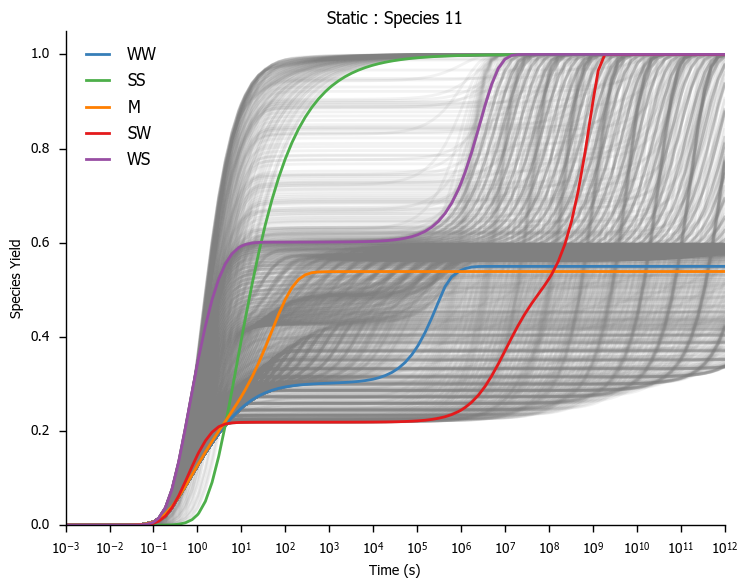

In [48]:
%%time

MainPlot = MakeRankPlot(StaticFlat)
MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )

In [19]:
StaticFlat[:,8000].shape

(112,)

In [20]:
%%time 
# Figure Settings
ImgFileName = "Static_RankPlot_Species_{}.pdf".format(Species)
Title       = "Static : Species {}".format(Species)
XAxisLabel  = 'Time (s)'

# ChangeDS("STV3StaticT")
# Static = FullOutArray[:,:,1,:,Species]
# YAxisLabel  = 'Assembly Efficiency Rank'
YAxisLabel  = 'Species Yield'
XAxisPoints = TimePoints
XLim = [np.min(XAxisPoints),np.max(XAxisPoints)]
# YAxisPoints = [x[-1,-1] for x in DSS.values()]
# YLim = [np.min(YAxisPoints),np.max(YAxisPoints)]
StaticFlatRanked = np.array([rankdata(Static[:,:,i], method='ordinal') for i in range(len(TimePoints))])

CPU times: user 162 ms, sys: 0 ns, total: 162 ms
Wall time: 162 ms


In [21]:
StaticFlatRanked[:,0].shape

(112,)

CPU times: user 15.5 s, sys: 0 ns, total: 15.5 s
Wall time: 15.6 s


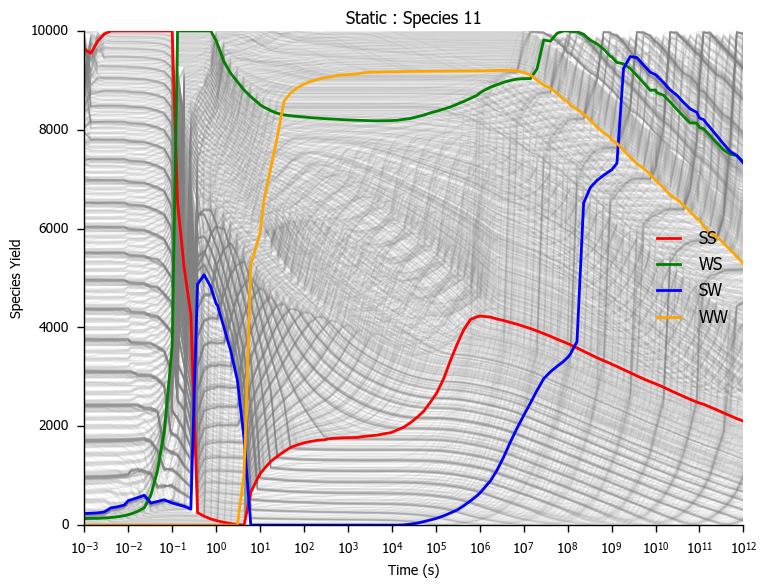

In [22]:
%%time
LineWidth = 2.0
MainPlot = MP.LinePlot(
    Width="double",
    YAxisInPercent = False
    );

for i in range(0,len(StaticFlat[0,:]),8):
    MainPlot.AddLine(
        XAxisPoints,
        StaticFlatRanked[:,i],
#         label="SS",
        color="grey",
    #     clip_on=True,
        alpha=0.1,
    #     marker = "o",
        zorder=0
        )

MainPlot.AddLine(
    XAxisPoints,
    StaticFlatRanked[:,9999],
    label="SS",
    color="red",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    StaticFlatRanked[:,99],
    label="WS",
    color="green",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    StaticFlatRanked[:,9900],
    label="SW",
    color="blue",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    StaticFlatRanked[:,0],
    label="WW",
    color="orange",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_B[XBounds]/B0,
#     label="B",
#     color="Blue",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=1
#     )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_AB[XBounds]/np.min([A0,B0]),
#     label="AB",
#     color="Green",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=0
#     )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])

# MainPlot.SetYRange(0.0,1.05)

# MainPlot.SetYRange(0.0, 1.05)

MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)
MainPlot._Plot.set_title(Title)
# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
# MainPlot.ChangeXAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )

In [23]:
# Figure Settings
ImgFileName = "RankFracPlot_TP_{:.2e}_{}.pdf".format(TimePoints[TT], Species)
Title       = "Time Point {:.2e} (s) Species {}".format(TimePoints[TT], Species)
XAxisLabel  = 'Cell Division Period (s)'
# YAxisLabel  = 'Assembly Efficiency Rank'
YAxisLabel  = 'Species Yield'
XAxisPoints = [x for x in DS_Ranked.keys()]
XLim = [np.min(XAxisPoints),np.max(XAxisPoints)]
# YAxisPoints = [x[-1,-1] for x in DSS.values()]
# YLim = [np.min(YAxisPoints),np.max(YAxisPoints)]

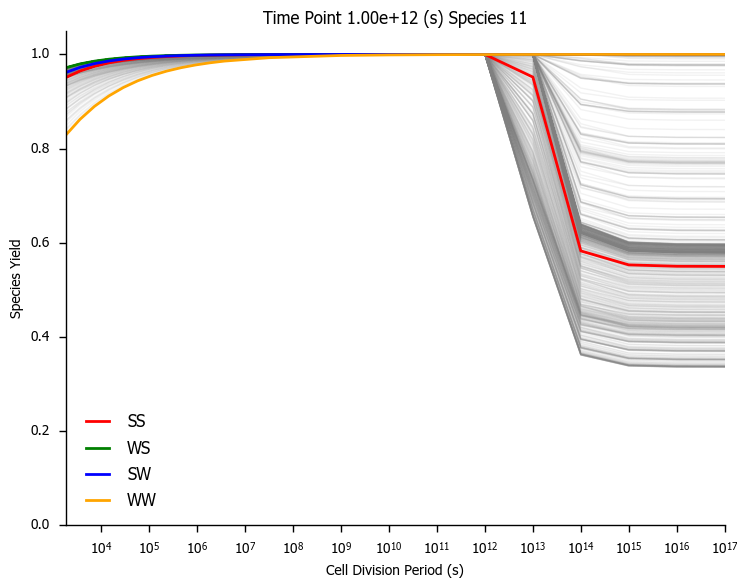

In [24]:
LineWidth = 2.0
MainPlot = MP.LinePlot(
    Width="double",
    YAxisInPercent = False
    );

for i in range(0,len(DS_Ranked.values()[0]),8):
    MainPlot.AddLine(
        XAxisPoints,
        [x[i] for x in DSS_Flat.values()],
#         label="SS",
        color="grey",
    #     clip_on=True,
        alpha=0.1,
    #     marker = "o",
        zorder=0
        )

MainPlot.AddLine(
    XAxisPoints,
    [x[9999] for x in DSS_Flat.values()],
    label="SS",
    color="red",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[99] for x in DSS_Flat.values()],
    label="WS",
    color="green",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[9900] for x in DSS_Flat.values()],
    label="SW",
    color="blue",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[0] for x in DSS_Flat.values()],
    label="WW",
    color="orange",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_B[XBounds]/B0,
#     label="B",
#     color="Blue",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=1
#     )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_AB[XBounds]/np.min([A0,B0]),
#     label="AB",
#     color="Green",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=0
#     )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])

MainPlot.SetYRange(0.0,1.05)

# MainPlot.SetYRange(0.0, 1.05)

MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)
MainPlot._Plot.set_title(Title)
# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
# MainPlot.ChangeXAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )

In [25]:
print "{:.2f} Days".format(TimePoints[TT]/60/24)
print "{:.2f} Years".format(TimePoints[TT]/60/24/365)

694444444.44 Days
1902587.52 Years


In [26]:
# Figure Settings
ImgFileName = "RankPlot_TP_{:.2e}_{}.pdf".format(TimePoints[TT], Species)
Title       = "Time Point {:.2e} (s) {}".format(TimePoints[TT], Species)
XAxisLabel  = 'Cell Division Period (s)'
YAxisLabel  = 'Assembly Efficiency Rank'
# YAxisLabel  = 'Species Yield'
XAxisPoints = [x for x in DS_Ranked.keys()]
XLim = [np.min(XAxisPoints),np.max(XAxisPoints)]
# YAxisPoints = [x[-1,-1] for x in DSS.values()]
# YLim = [np.min(YAxisPoints),np.max(YAxisPoints)]

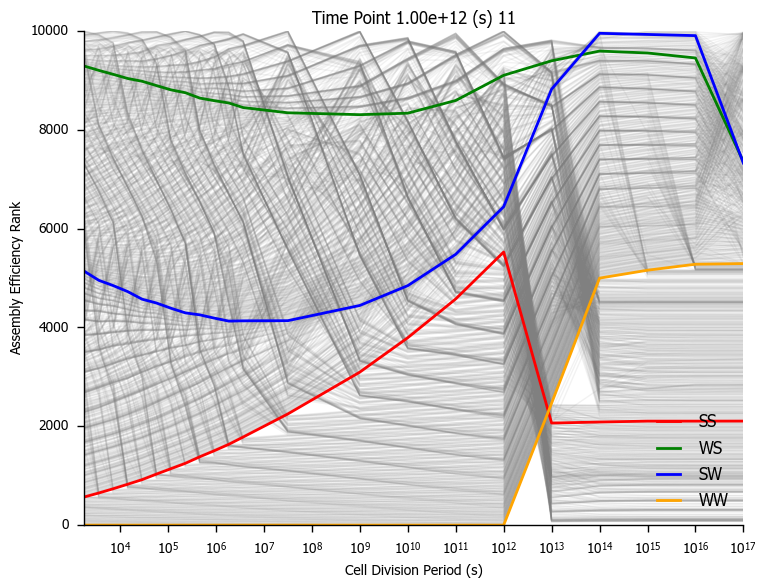

In [27]:
LineWidth = 2.0
MainPlot = MP.LinePlot(
    Width="double",
    YAxisInPercent = False
    );

for i in range(0,len(DS_Ranked.values()[0]),8):
    MainPlot.AddLine(
        XAxisPoints,
        [x[i] for x in DS_Ranked.values()],
#         label="SS",
        color="grey",
    #     clip_on=True,
        alpha=0.1,
    #     marker = "o",
        zorder=0
        )

MainPlot.AddLine(
    XAxisPoints,
    [x[9999] for x in DS_Ranked.values()],
    label="SS",
    color="red",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[99] for x in DS_Ranked.values()],
    label="WS",
    color="green",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[9900] for x in DS_Ranked.values()],
    label="SW",
    color="blue",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[0] for x in DS_Ranked.values()],
    label="WW",
    color="orange",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_B[XBounds]/B0,
#     label="B",
#     color="Blue",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=1
#     )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_AB[XBounds]/np.min([A0,B0]),
#     label="AB",
#     color="Green",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=0
#     )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])

# MainPlot.SetYRange(0.0,1.05)

# MainPlot.SetYRange(0.0, 1.05)

MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)
MainPlot._Plot.set_title(Title)
# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
# MainPlot.ChangeXAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )

## Pathway Plots

In [28]:
DS_Name = "STV2SynDeg28e-04T"
# DS_Name = "STV2StaticT"
ChangeDS(DS_Name)

Working Name: STV2SynDeg28e-04T
Shape: (100, 100)
Errors: 0
HasData: 1344000000


In [29]:
# Setup Once

import MPLGUI as MP

# Add Binary Asm Pathways
import AsmPathsBinary as AB
D, SortedPathways = AB.AsmPathways()
P = AB.Probabilities(D)
def PathwayPlot(Fraction, Concentration, Axes):
    P.UpdateConcentrations(Fraction, Concentration)
    return AB.PathBarPlot(SortedPathways, P.PathIndependentFlux, Show=False, Axes=Axes)

In [30]:
print (np.min(KD1Range))
print (np.max(KD1Range))
print (np.min(A0Range))
print (np.max(A0Range))

1e-12
0.001
1e-12
0.001


In [31]:
# Setup Each Run
# KD1 = 1e-12
# KD1 = 1e-3
# KD2 = 1e-12
KD1 = 1e-3
KD2 = 1e-3
# TimeTarget = np.argmax(TimePoints > 3600.0)
TimeTarget = -1
Frac = FullOutArray[KD1Range==KD1,KD2Range==KD2,:,TimeTarget,:][0]



In [32]:
A0Start = 0
A0Stop = len(A0Range)

# A0Start = np.argmax(A0Range > 1e-9)-1
# A0Stop = np.argmax(A0Range > 1e-4)
    
ConcRange = A0Range[A0Start:A0Stop]

FinalFlux = np.zeros(len(SortedPathways.values()))
Flux3D = np.zeros([len(ConcRange),len(SortedPathways.values())])

for i in range(A0Stop-A0Start):
    P.UpdateConcentrations(Frac[A0Start+i,:], A0Range[A0Start+i])

    for k, Path in enumerate(SortedPathways.values()):
        T = P.PathIndependentFlux(Path, Probability = True)
        FinalFlux[k] = T
    Flux3D[i] = FinalFlux
FluxIndex = range(1, len(FinalFlux)+1)
# -------------------------------------------------------------
global SaveAverage
global SaveStdDev
# Average = np.zeroes(len(FluxIndex),dtype=np.float)
Average = np.mean(Flux3D,axis=0)
Error = np.ones([2, len(Average)],dtype=np.float)
Error[0] = (Average-np.min(Flux3D,axis=0))
Error[1] = (np.max(Flux3D,axis=0)-Average)
# Error[1] = np.std(Flux3D,axis=0)
# Error[0] = np.std(Flux3D,axis=0)
# Error = Error/100.0
# Error[:,0] = np.min(Flux3D[:,])+Average[-1],np.max(Flux3D[:,i-1])-Average[-1]])
#     print ("{} : {} : {} : {}".format(i, Average[-1], Error[-1][0], Error[-1][1]))

In [33]:
I = 15
print Average[I]
print Error[:,I]

7.34806708788e-07
[  7.34049231e-07   8.27750430e-06]


/home/vatir/anaconda3/envs/DataViewer27/lib/python2.7/site-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


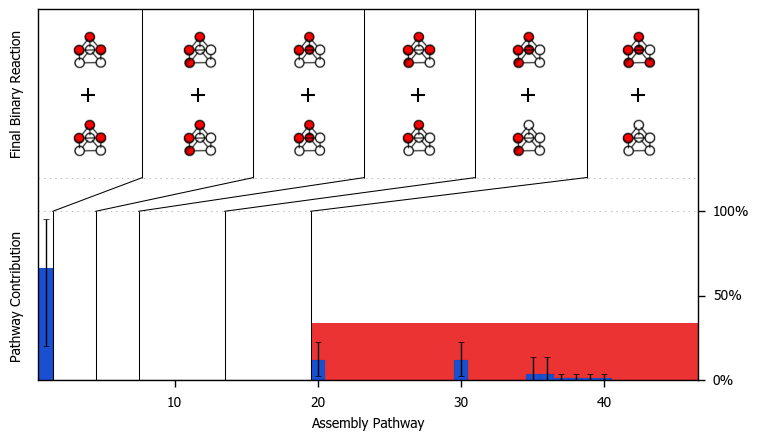

In [34]:
MainPlot = MP.RankWBinaryImages(Aspect=(16.0/9.0))
MainPlot.SetPathwayData(Average, Error)
#  0 :	"32  1 0 0.0 0 0.png"
#  1 : 	"48  1 1 0.0 0 0.png"
#  2 : 	"36  1 0 0.1 0 0.png"
#  3 : 	"56  1 1 1.0 0 0.png"
#  4 : 	"52  1 1 0.1 0 0.png"
#  5 : 	"50  1 1 0.0 1 0.png"
#  6 : 	"60  1 1 1.1 0 0.png"
#  7 : 	"53  1 1 0.1 0 1.png"
#  8 : 	"54  1 1 0.1 1 0.png"
#  9 : 	"51  1 1 0.0 1 1.png"
# 10 : 	"62  1 1 1.1 1 0.png"
# 11 : 	"63  1 1 1.1 1 1.png"

ImageOrderTop = [
    3,4,5,6,8,10,
    ]
ImageOrderBottom = [
    3,4,5,1,2,0,
    ]
Images = MP.ImportImages()
StepWidth = 46.0/6.0
#ImageZoom = 0.09
ImageZoom = 0.065
XOffset = 0.15
TopRowPos		=	1.95
# BottomRowPos	=	1.45
BottomRowPos	=	1.425
for Index in np.arange(1.0,7.0):
    MainPlot._Plot.plot(
        StepWidth*Index-StepWidth/2.0+XOffset,
        (TopRowPos+BottomRowPos)/2.0,
        '+',
        color	=	"black",
        mew		=	1.5,
        ms		=	10.0,
    )
    xy = [StepWidth*Index-StepWidth/2.0+XOffset, TopRowPos]
    ab = MP.AnnotationBbox(
        MP.OffsetImage(
            Images[ImageOrderTop[int(Index-1)]],
            zoom = ImageZoom,
            resample = True,
            dpi_cor = False,
            # Interpolation Options : 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
            interpolation = "gaussian",
            ),
        xy,
        xybox=(1.0, 1.0),
        xycoords='data',
        boxcoords="offset points",
        pad=0.0,
        frameon = False,

        )
    MainPlot._Plot.add_artist(ab)

for Index in np.arange(1.0,7.0):
    xy = [StepWidth*Index-StepWidth/2.0+XOffset, BottomRowPos]
    ab = MP.AnnotationBbox(
        MP.OffsetImage(
            Images[ImageOrderBottom[int(Index-1)]],
            zoom = ImageZoom,
            resample = True,
            dpi_cor = False,
            # Interpolation Options : 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
            interpolation = "gaussian",
            ),
        xy,
        xybox=(1.0, 1.0),
        xycoords='data',
        boxcoords="offset points",
        pad=0.0,
        frameon = False,

        )
    MainPlot._Plot.add_artist(ab)